In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Drift

In [2]:
from astra import Astra
from distgen import Generator

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'
import os

In [3]:
# Input template file 
ASTRA_IN = '../templates/drift/astra.in'
DISTGEN_IN = '../templates/drift/distgen.yaml'

In [4]:
G = Generator(DISTGEN_IN)
G.run()
P0 = G.particles
P0

<ParticleGroup with 20000 particles at 0x15921f5e0>

In [5]:
# Make an Astra object
A = Astra(input_file=ASTRA_IN, initial_particles=P0, verbose=True)

In [6]:
# Run
A.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpw3eo97pz/astra.particles
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpw3eo97pz/astra.particles exists, will not symlink
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                 Version 3.2 - macOS 64bit - Intel   
                        DESY,  Hamburg 2011          
                        Sat Oct 16 09:04:59 

     Parameter file is:  astra.in                                          
     Drift example                                                                   

 Initialize element settings:
 --------------------------------------------------------------------------
   20001 particles from file astra.particles                                   

     Emittance calculation suppressed for N < 5
     Particles taken into account      N =          1
     total charge                      Q =     -1.00

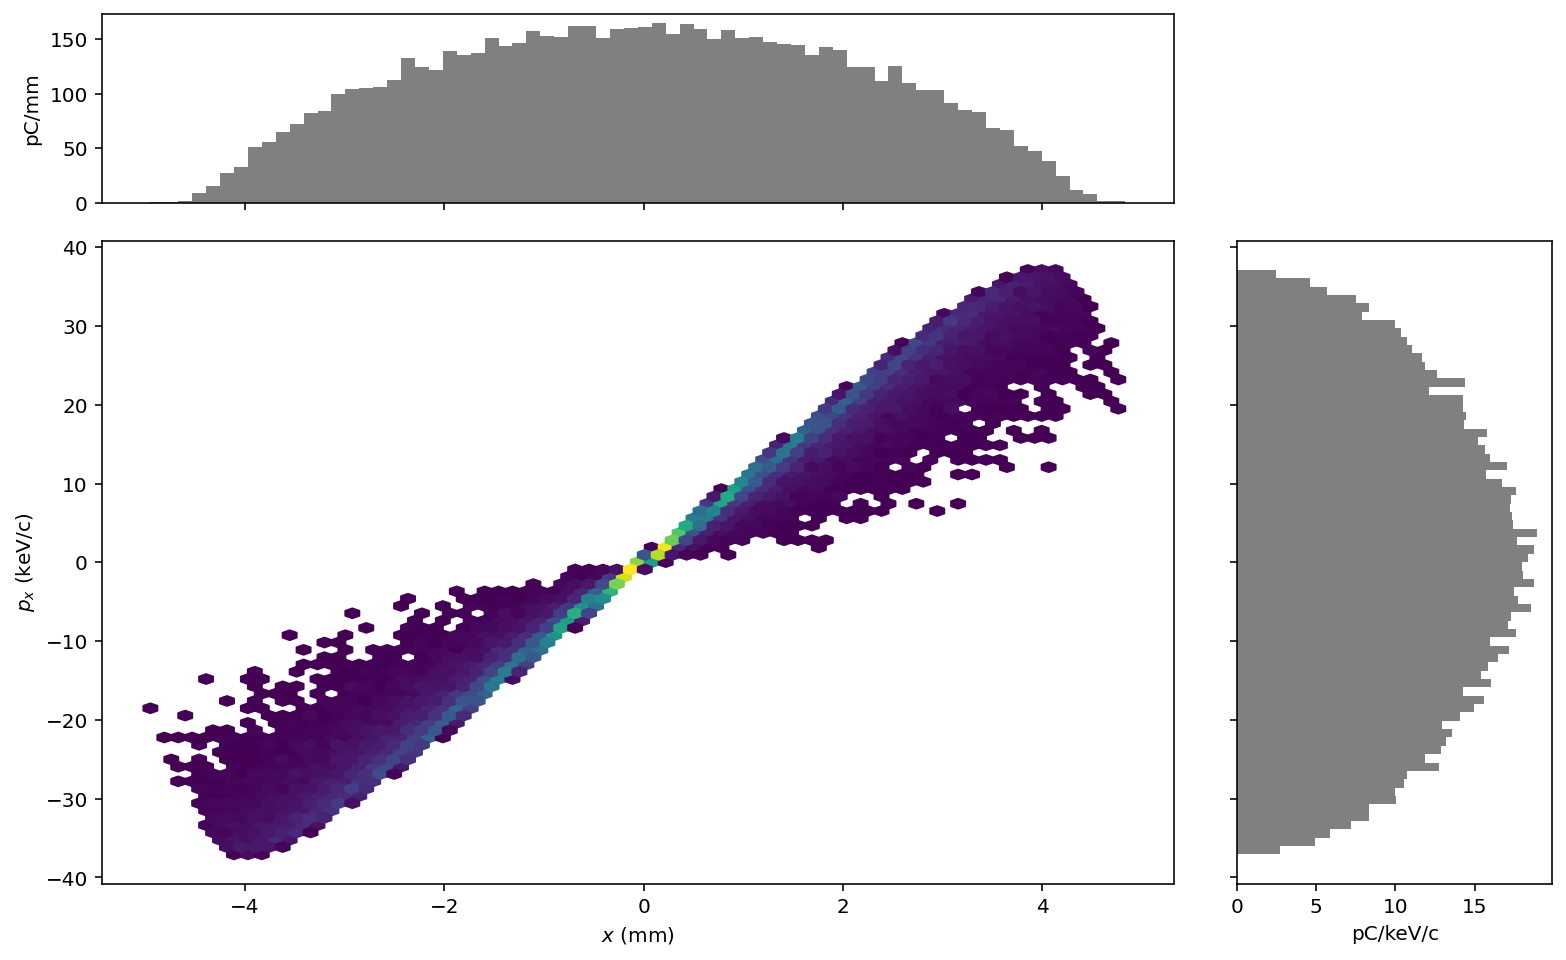

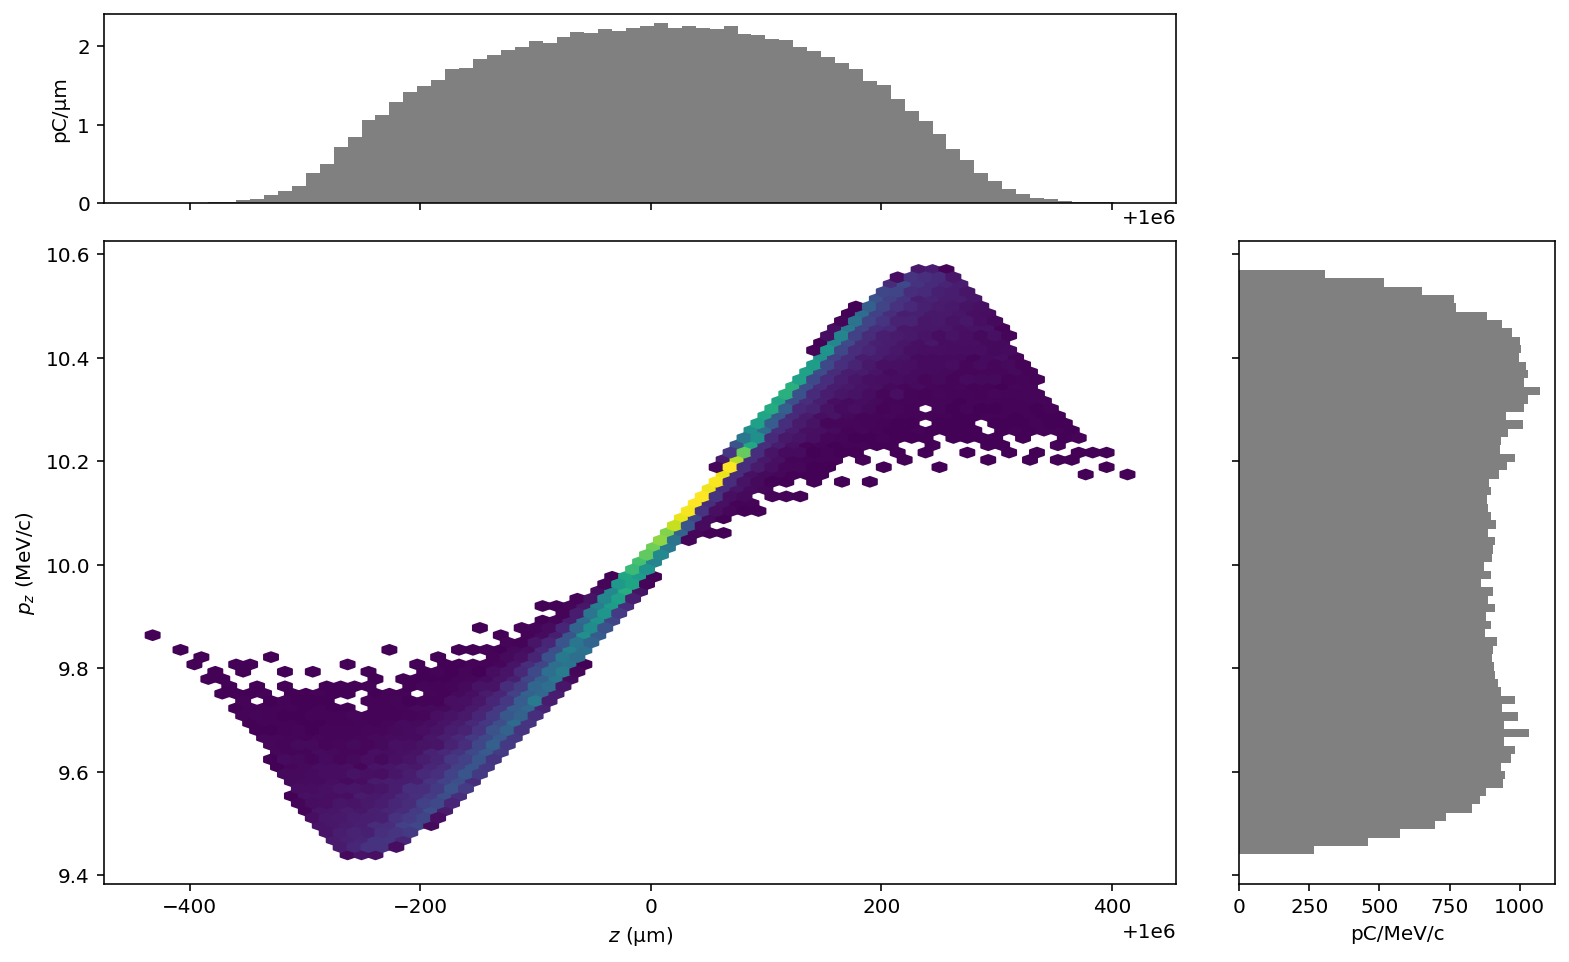

In [7]:
P = A.particles[-1]
P.plot('x', 'px')
P.plot('z', 'pz')

# 3D 

In [8]:
A2 = A.copy()
A2.input['charge']['lspch'] = True
A2.input['charge']['lspch3d'] = True
A2.input['charge']['l2d_3d'] = False
A2.input['charge']['nxf'] = 32
A2.input['charge']['nyf'] = 32
A2.input['charge']['nzf'] = 32
A2.input['charge']['nx0'] = 4
A2.input['charge']['ny0'] = 4
A2.input['charge']['nz0'] = 4
A2.configure()
A2.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp8xjn4_iq/astra.particles
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp8xjn4_iq/astra.particles exists, will not symlink
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                 Version 3.2 - macOS 64bit - Intel   
                        DESY,  Hamburg 2011          
                        Sat Oct 16 09:05:22 

     Parameter file is:  astra.in                                          
     Drift example                                                                   

 Initialize element settings:
 --------------------------------------------------------------------------
   20001 particles from file astra.particles                                   

     Emittance calculation suppressed for N < 5
     Particles taken into account      N =          1
     total charge                      Q =     -1.00

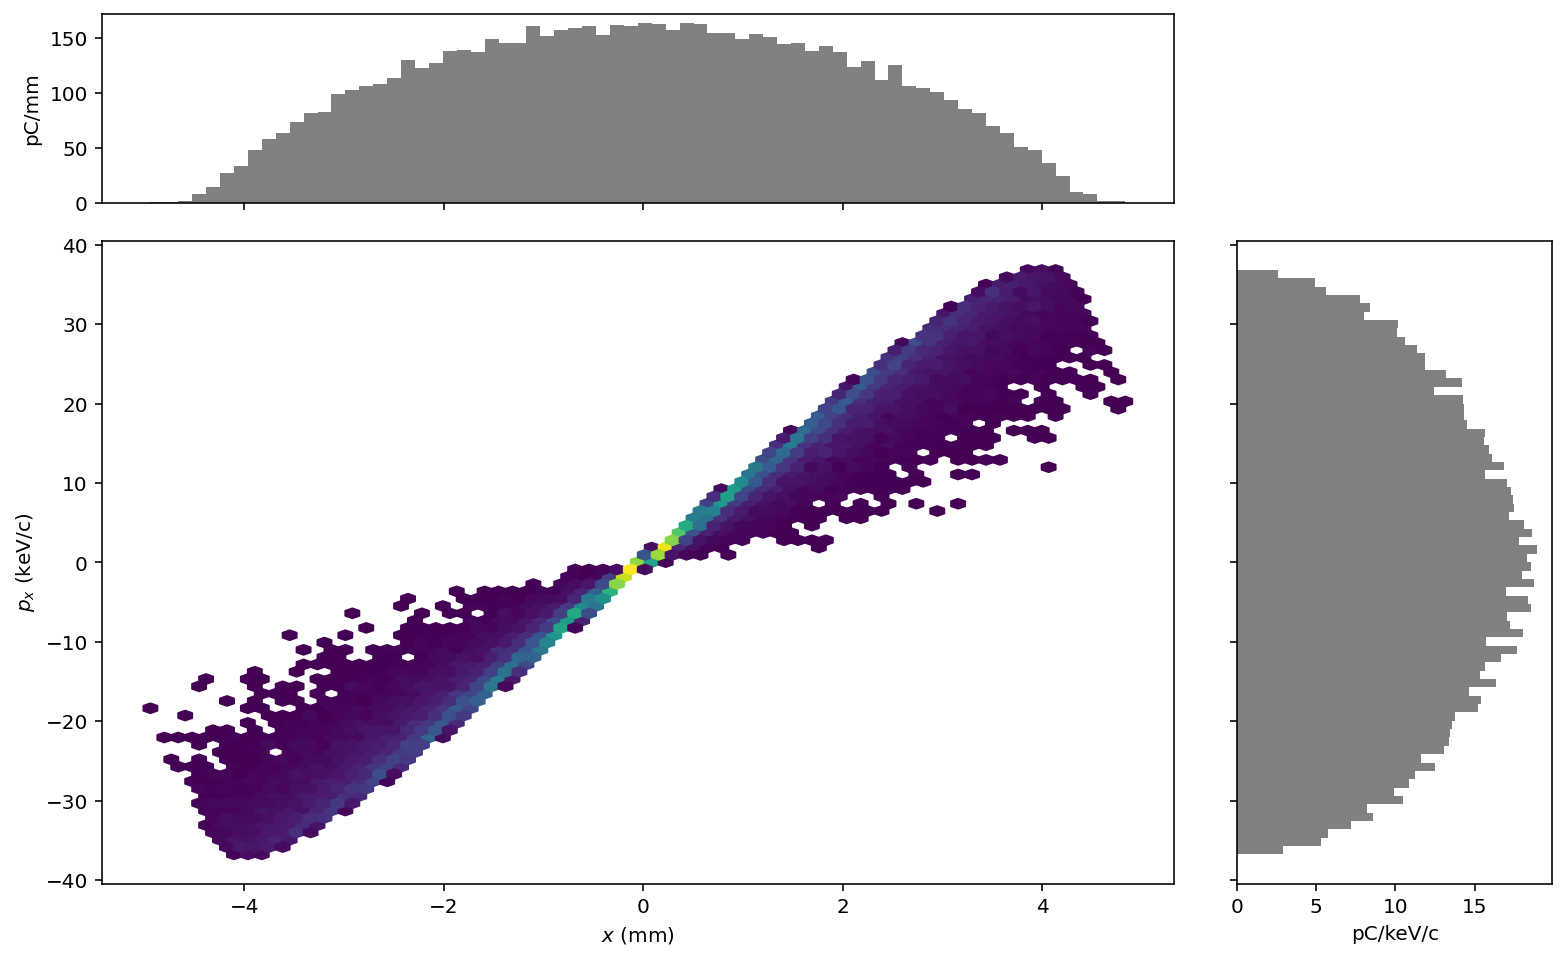

In [9]:
P2 = A2.particles[-1]
P2.plot('x', 'px')

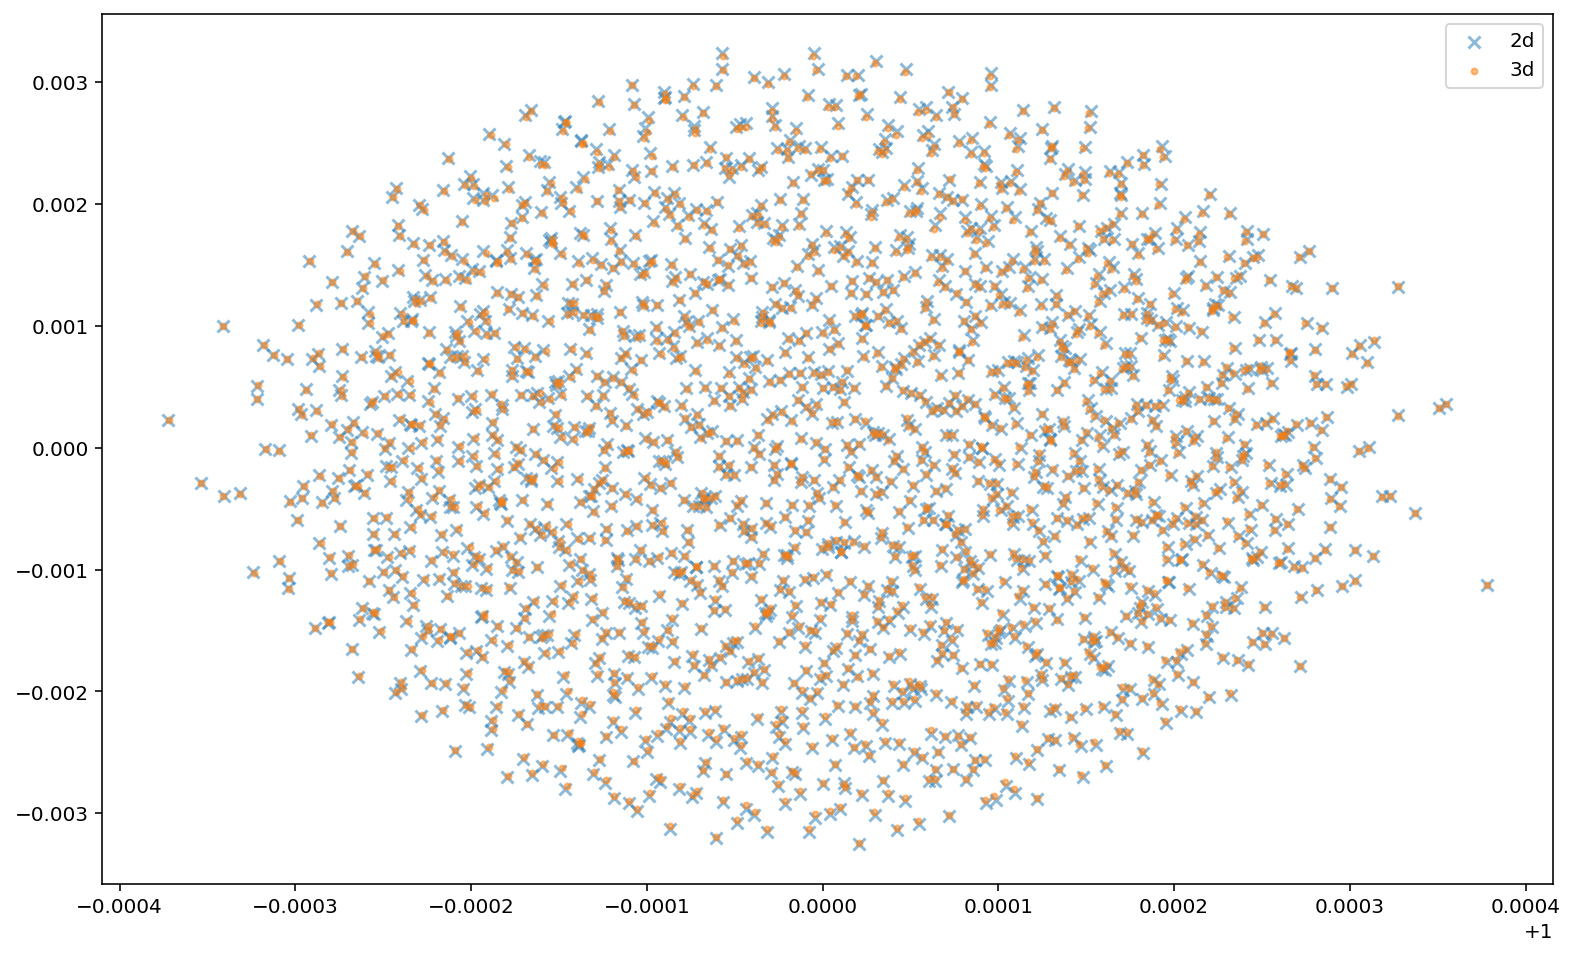

In [10]:
k1 = 'z'
k2 = 'x'
skip = 10
plt.scatter(P[k1][::skip], P[k2][::skip], label='2d', marker='x', alpha=0.5)
plt.scatter(P2[k1][::skip], P2[k2][::skip], label='3d', marker='.', alpha=0.5)
plt.legend()

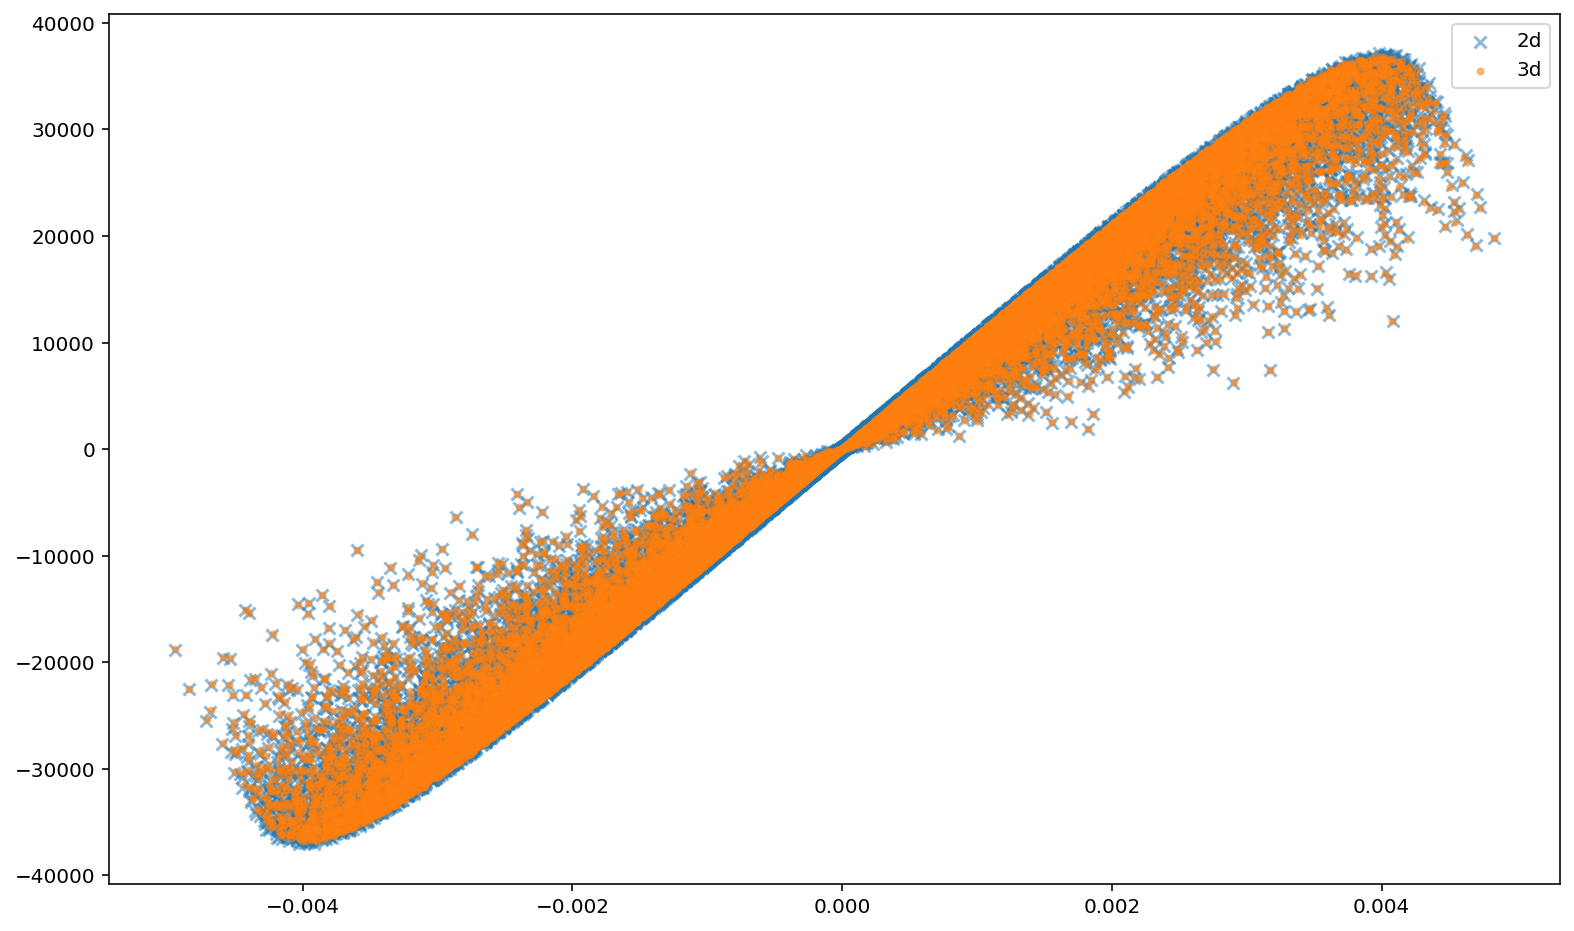

In [11]:
k1 = 'x'
k2 = 'px'
skip = 1
plt.scatter(P[k1][::skip], P[k2][::skip], label='2d', marker='x', alpha=0.5)
plt.scatter(P2[k1][::skip], P2[k2][::skip], label='3d', marker='.', alpha=0.5)
plt.legend()